# Model 3: Improve model with a better optimizer


## Load modules

In [1]:
from keras.models import Sequential, clone_model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.regularizers import L1L2

import helpers

## Load dataset

In [55]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

## Model 3 architecture

Let's recompile the same model with Adam, which is ususally prefered over SGD for image classification. Reasons:

- Adaptive Learning Rate: Adam adapts the learning rate for each parameter, making it more efficient in handling sparse gradients or noisy data, while SGD uses a fixed learning rate unless momentum or schedules are applied.

- Faster Convergence: Adam combines momentum and adaptive learning rates, helping it converge faster and more efficiently, especially in complex models.

- Less Hyperparameter Tuning: Adam works well with default settings, whereas SGD typically requires more careful tuning of learning rates and momentum.



In [57]:
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [21]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# implement callbacks
lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))

# train model
history = model.fit(
    x_train, y_train, 
    batch_size=512, 
    epochs=15, 
    validation_split=0.1,
    callbacks=[lr_schedule]
)


Epoch 1/15


2024-09-25 14:34:08.283497: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


88/88 [==============================] - 16s 117ms/step - loss: 1.3915 - accuracy: 0.5887 - val_loss: 1.4281 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 2/15
88/88 [==============================] - 10s 111ms/step - loss: 0.7141 - accuracy: 0.7502 - val_loss: 0.8785 - val_accuracy: 0.7068 - lr: 8.9125e-04
Epoch 3/15
88/88 [==============================] - 10s 111ms/step - loss: 0.5076 - accuracy: 0.8238 - val_loss: 0.7812 - val_accuracy: 0.7426 - lr: 7.9433e-04
Epoch 4/15
88/88 [==============================] - 10s 111ms/step - loss: 0.3438 - accuracy: 0.8816 - val_loss: 0.6790 - val_accuracy: 0.7810 - lr: 7.0795e-04
Epoch 5/15
88/88 [==============================] - 10s 111ms/step - loss: 0.2043 - accuracy: 0.9350 - val_loss: 0.6489 - val_accuracy: 0.7954 - lr: 6.3096e-04
Epoch 6/15
88/88 [==============================] - 10s 112ms/step - loss: 0.0981 - accuracy: 0.9735 - val_loss: 0.6135 - val_accuracy: 0.8084 - lr: 5.6234e-04
Epoch 7/15
88/88 [==============================] - 10s

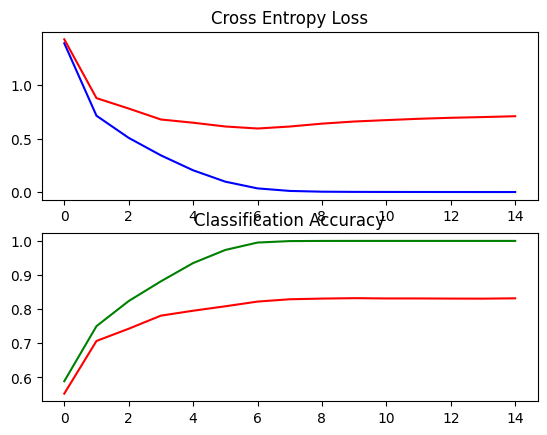

313/313 [==============================] - 2s 6ms/step - loss: 0.7694 - accuracy: 0.8237
Model Loss: 0.7693952918052673
Model Accuracy: 0.8237000107765198
313/313 [==============================] - 1s 3ms/step


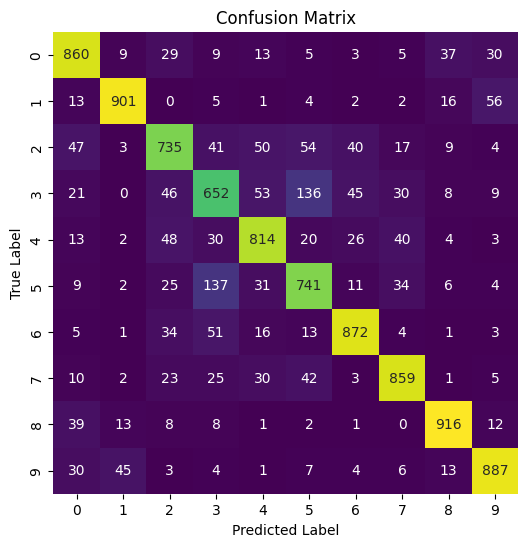

In [22]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)